In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle

In [2]:
#creating a data frame for the dataset
diamonds = pd.read_csv('/content/DiamondsPrices.csv')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
#Checking if the dataset contains NaNs
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

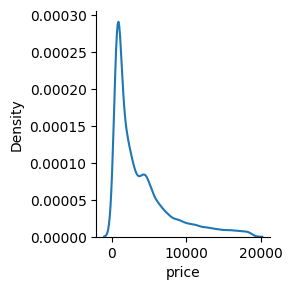

In [4]:
#generating a graph to see the prices disrtibution
sns.FacetGrid(diamonds, palette='husl').map(sns.kdeplot, 'price')
plt.show()

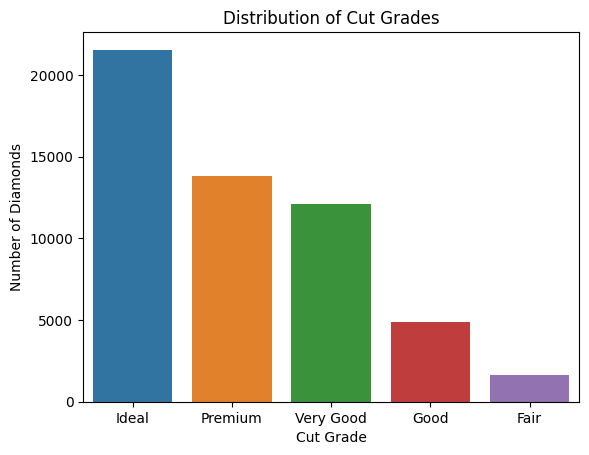

In [ ]:
#Visualizing the distribution of cut grades
cut_count = diamonds['cut'].value_counts()
sns.barplot(x=cut_count.index, y=cut_count.values)
plt.title('Distribution of Cut Grades')
plt.ylabel('Number of Diamonds')
plt.xlabel('Cut Grade')
plt.show()

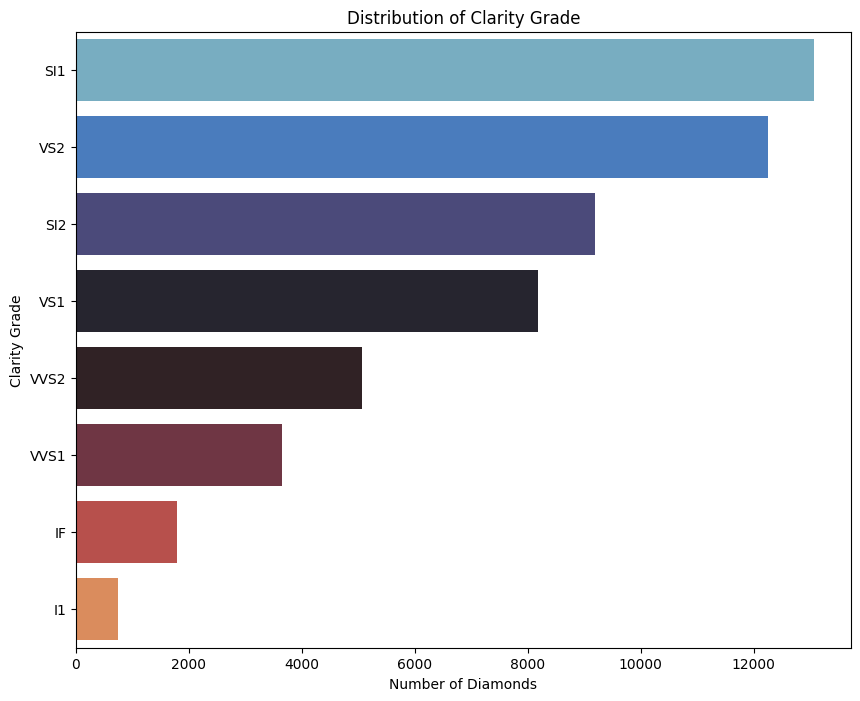

In [ ]:
#Visualizing distribution of clarity
clarity_count = diamonds['clarity'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=clarity_count.values, y=clarity_count.index, orientation='horizontal', palette='icefire')
plt.title('Distribution of Clarity Grade')
plt.xlabel('Number of Diamonds')
plt.ylabel('Clarity Grade')
plt.show()

<Axes: title={'center': 'Pie Chart of Color Distribution'}, ylabel='color'>

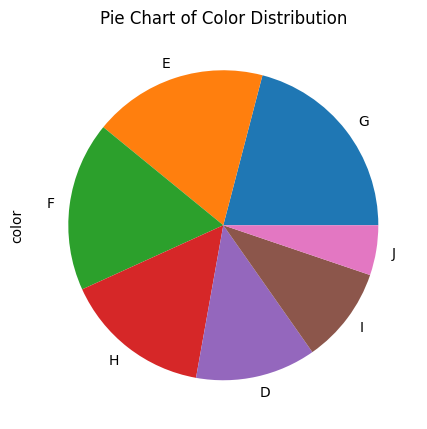

In [ ]:
#Visualizing the distribution of the color
colors_count = diamonds['color'].value_counts()
plt.figure(figsize=(5,8))
colors_count.plot.pie(title="Pie Chart of Color Distribution")

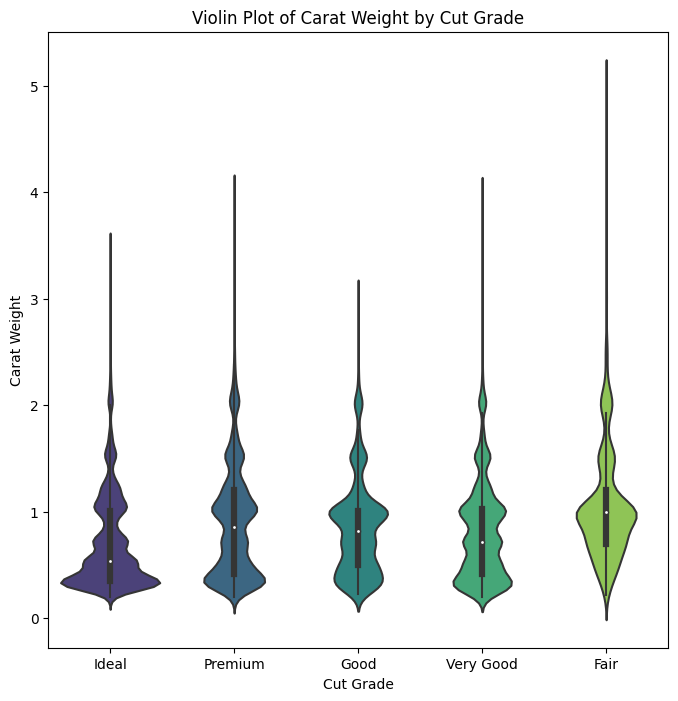

In [ ]:
#Visualizing density of the diamonds' weight by cut grade
plt.figure(figsize=(8,8))
sns.violinplot(x=diamonds['cut'], y=diamonds['carat'], palette='viridis')
plt.xlabel('Cut Grade')
plt.ylabel('Carat Weight')
plt.title('Violin Plot of Carat Weight by Cut Grade')
plt.show()

<ipython-input-8-8102725dfa6f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diamonds.corr())


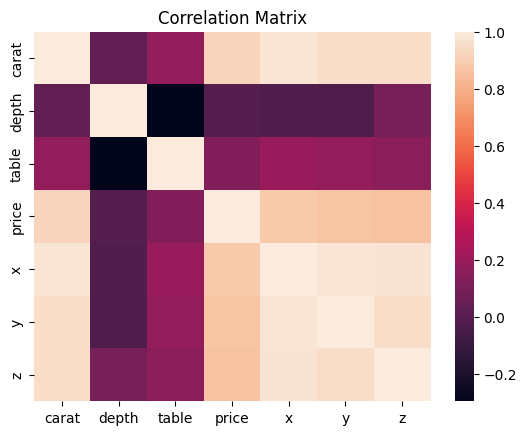

In [ ]:
#generating a correlation matrix
sns.heatmap(diamonds.corr())
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#encoding the cut column
#setting up a map of values
cut_map = {'Ideal':5,
           'Premium':4,
            'Very Good':3,
            'Good':2,
            'Fair':1
           }
#encoding the values by applying the map
diamonds['cut']=diamonds.cut.replace(cut_map)

In [ ]:
#encoding the color column
#setting up a map for the column
color_map = {'D':7,
             'E':6,
             'F':5,
             'G':4,
             'H':3,
             'I':2,
             'J':1
}
#encoding the values by applying the map
diamonds.color = diamonds.color.replace(color_map)

In [ ]:
#encoding the clarity column
#setting up a map for the column
clarity_map = {
    'IF':8,
    'VVS1':7,
    'VVS2':6,
    'VS1':5,
    'VS2':4,
    'SI1':3,
    'SI2':2,
    'I1':1
}
#applying the map
diamonds.clarity = diamonds.clarity.replace(clarity_map)

In [ ]:
#separating the features and targets
X = diamonds.drop('price', axis=1)
y = diamonds.price

In [ ]:
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=10)

In [ ]:
#Standardizing the features
sc =  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Creating a model and training it on the training data
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Making predictions on the test data
y_pred = LR.predict(X_test)

In [ ]:
#Calculating the R squared
r2 = r2_score(y_test, y_pred)
print(f'R2:{r2}')

R2:0.9077783834895473


In [ ]:
#Calculating the MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 811.2794542063726


In [ ]:
#Calculating the MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 1511097.0679875656


In [ ]:
#Calculating the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1229.2668823276601


In [ ]:
#exporting the model
with open('diamonds_price_prediction_model.pkl', 'wb') as f:
  pickle.dump(LR, f)

#exporting the scaler
with open('diamond_scaler.pkl', 'wb') as f:
  pickle.dump(sc, f)